# Using confocal reconstruction algorithms with `y-tal`

<div class="admonition important alert alert-block alert-warning">

If you follow this tutorial, please pay attention to the `compensate_laser_cos_dsqr` line. You will know when you reach it.

</div>

## Overview

<div class="admonition important alert alert-block alert-success">

🚀 **You will learn how to:**

<ul>
  <li>
  
  Import `y-tal` and load *confocal* non-line-of-sight capture data generated using `tal render`.
  
  </li>
  <li>
  
  Prepare confocal data before reconstruction, applying cosine and d^2 compensation.
  
  </li>
  <li>
  
  Use different confocal reconstruction algorithms and visualize their results.
  
  </li>
</ul>

</div>

In [ ]:
import tal
print('Executed using tal version:', tal.__version__)

# If you want to follow this tutorial,
# you need to first obtain this file, either by running
# the corresponding `render` tutorial, or by downloading it
# (see the top-level README on the examples/ folder)
filename = 'data/tal/bunny-confocal-128x128.hdf5'

data = tal.io.read_capture(filename)

Executed using tal version: 0.21.0


In [8]:
tal.reconstruct.compensate_laser_cos_dsqr(data)

Because this is a test scene, we know that the hidden geometry is placed at Z=1

# Filtered backprojection / phasor fields

In [9]:
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[1.0,])
print(volume_xyz.shape)

(128, 128, 1, 3)


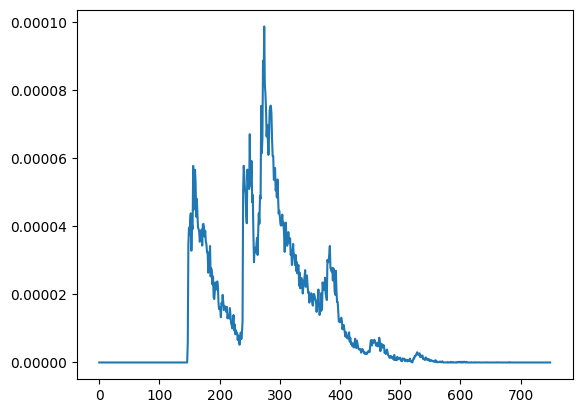

In [10]:
import matplotlib.pyplot as plt

plt.plot(data.H[:, 32, 32])

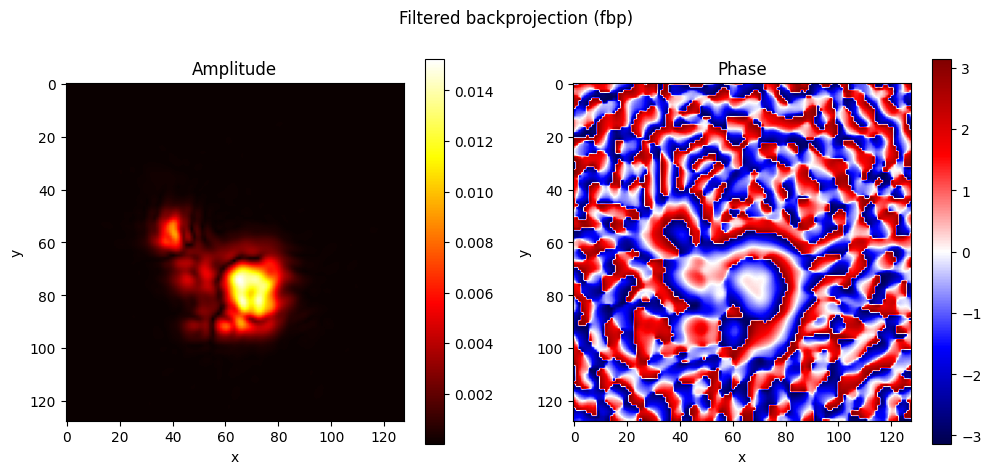

In [13]:
tal.set_log_level(tal.LogLevel.WARNING)
with tal.resources(8, 32):
    H_1 = tal.reconstruct.fbp.solve(data,
                                    wl_mean=0.15, wl_sigma=0.15,
                                    volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
tal.plot.amplitude_phase(H_1, title='Filtered backprojection (fbp)')
tal.set_log_level(tal.LogLevel.TRACE)

# Light cone transform

# f-k migration

In [3]:
import tal
data_bike = tal.io.read_capture('data/fk-parsed/bike_meas_180min.hdf5')
data_bike.downscale(4)

Downscaled from 512x512 to 128x128


In [4]:
H_1 = tal.reconstruct.fk.solve(data_bike)

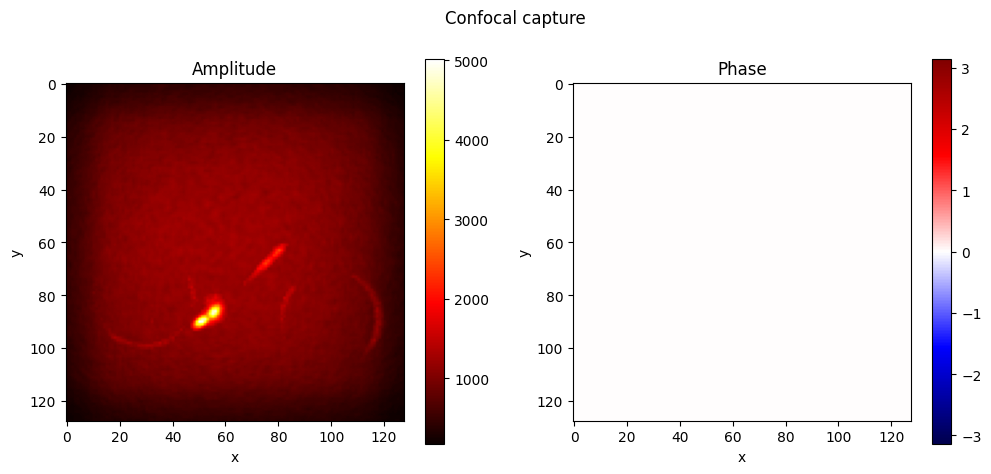

In [6]:
import numpy as np
tal.plot.amplitude_phase(np.max(np.abs(H_1), axis=0), title='Confocal capture')